### 案例场景：每个销售型公司都有一定的促销费用，促销费用可以带来销售量的增加，当给出一定的销售费用，预计可以带来多大的商品销售量？

In [1]:
import re
import numpy 
from sklearn import linear_model
from matplotlib import pyplot as plt

/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### 1.导入数据

In [2]:
fn = open('data.txt', 'r')
all_data = fn.readlines()
fn.close()

In [5]:
all_data

['28192.0\t68980.0\n',
 '39275.0\t78875.0\n',
 '34512.0\t81400.0\n',
 '24430.0\t80624.0\n',
 '23811.0\t65562.0\n',
 '34856.0\t94603.0\n',
 '23069.0\t49705.0\n',
 '34727.0\t86060.0\n',
 '32902.0\t93485.0\n',
 '28591.0\t66033.0\n',
 '26938.0\t65446.0\n',
 '32227.0\t84685.0\n',
 '18433.0\t43105.0\n',
 '27842.0\t62648.0\n',
 '36596.0\t92935.0\n',
 '40951.0\t108329.0\n',
 '29682.0\t78204.0\n',
 '45987.0\t108277.0\n',
 '43236.0\t120000.0\n',
 '25495.0\t71841.0\n',
 '39292.0\t104747.0\n',
 '46899.0\t109272.0\n',
 '27541.0\t87669.0\n',
 '33771.0\t85308.0\n',
 '37487.0\t103226.0\n',
 '37623.0\t111957.0\n',
 '47354.0\t116192.0\n',
 '33942.0\t83547.0\n',
 '28289.0\t88000.0\n',
 '43888.0\t108558.0\n',
 '23748.0\t56323.0\n',
 '26374.0\t71453.0\n',
 '22478.0\t55535.0\n',
 '34311.0\t97956.0\n',
 '31262.0\t60472.0\n',
 '35013.0\t96611.0\n',
 '32369.0\t94611.0\n',
 '27831.0\t75674.0\n',
 '31605.0\t65021.0\n',
 '20784.0\t63729.0\n',
 '39920.0\t88493.0\n',
 '34493.0\t86494.0\n',
 '17023.0\t51546.0\n',
 '

#### 2.数据预处理

In [10]:
x = []
y = []
for single_data in all_data:
    # 将x,y数据分割成列表形式
    tmp_data = re.split('\t|\n', single_data)
    x.append(float(tmp_data[0]))
    y.append(float(tmp_data[1]))
# 将列类型的数据转换成数组类型的数据
x = numpy.array(x).reshape([100, 1])
y = numpy.array(y).reshape([100, 1])

In [13]:
# x
y

array([[ 68980.],
       [ 78875.],
       [ 81400.],
       [ 80624.],
       [ 65562.],
       [ 94603.],
       [ 49705.],
       [ 86060.],
       [ 93485.],
       [ 66033.],
       [ 65446.],
       [ 84685.],
       [ 43105.],
       [ 62648.],
       [ 92935.],
       [108329.],
       [ 78204.],
       [108277.],
       [120000.],
       [ 71841.],
       [104747.],
       [109272.],
       [ 87669.],
       [ 85308.],
       [103226.],
       [111957.],
       [116192.],
       [ 83547.],
       [ 88000.],
       [108558.],
       [ 56323.],
       [ 71453.],
       [ 55535.],
       [ 97956.],
       [ 60472.],
       [ 96611.],
       [ 94611.],
       [ 75674.],
       [ 65021.],
       [ 63729.],
       [ 88493.],
       [ 86494.],
       [ 51546.],
       [106787.],
       [ 87756.],
       [ 58705.],
       [111732.],
       [ 65477.],
       [107412.],
       [ 71388.],
       [ 74983.],
       [ 44738.],
       [ 70993.],
       [ 81995.],
       [ 95467.],
       [ 8

#### 3.数据分析

- 通过散点图来选择需要使用的模型

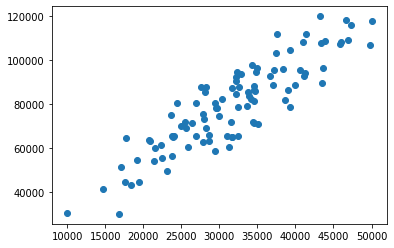

In [14]:
plt.scatter(x, y)
plt.show()

_通过散点图发现x,y呈明显的线性关系。初步判断可以选择线性回归进行模型拟合_

#### 4.数据建模

- 使用sklearn中的线性回归模型实现

In [15]:
# 创建模型对象
model = linear_model.LinearRegression()
# 将x,y分别作为自变量和因变量输入模型进行训练
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 5.模型评估

- 模型拟合的校验和评估

In [21]:
# 获取模型的自变量系数
model_coef = model.coef_
# 获取模型的截距
model_intercept = model.intercept_
# 获取模型的决定系数R方
r2 = model.score(x, y)

#### 6.销售预测

- 给出促销费用，预测销售量

In [33]:
# 促销费用
promotion_cost = 100000
promotion_cost = numpy.array(promotion_cost)
pre_y = model.predict(promotion_cost.reshape(-1, 1))

In [34]:
pre_y[0][0]

222639.02972069924

_由预测值可以得出，假如促销费用是10万，那么就可以有22万的销售量_